# 2.1 ОСНОВНЫЕ СПОСОБЫ ВИЗУАЛИЗАЦИИ

Одномерная визуализация

В случае проведения измерений для множества изучаемых участников (пользователей, членов организации и т.д.) несколько временных рядов рассматриваются параллельно. Всегда неплохо сопоставить их в графическом виде, заключив данные отдельных участников в соответствующие временные рамки. На этом этапе объектом исследования выступают не отдельные временные точки, а временные диапазоны. Предметом анализа становятся временные интервалы. Несмотря на широкий выбор инструментов, мы будем проводить анализ с помощью пакета timevis языка R. Нам предстоит изучить подмножество данных о добровольных взносах, подготовленное ранее donations. csv.

In [2]:
library(data.table)
require (timevis)
donations = fread ("donations.csv")

In [3]:
donations

amount,timestamp,member
<dbl>,<dttm>,<dbl>
25,2017-11-12 11:13:44,0
50,2015-08-25 19:01:45,0
25,2015-03-26 12:03:47,0
50,2016-07-06 12:24:55,0
50,2016-05-11 18:13:04,1
75,2017-01-23 12:55:47,1
50,2016-05-05 19:03:13,1
50,2017-07-25 11:39:21,2
25,2016-06-07 21:50:09,2


In [1]:
timevis() %>%
addItems(data.frame(start = c(Sys.Date(), Sys.Date() - 1),
content = c("Today", "Yesterday")))

ERROR: Error in timevis() %>% addItems(data.frame(start = c(Sys.Date(), Sys.Date() - : не могу найти функцию "%>%"


In [2]:
timevis(data = data.frame(
start = c(Sys.Date(), Sys.Date(), Sys.Date() + 1, Sys.Date() + 2),
content = c("one", "two", "three", "four"),
group = c(1, 2, 1, 2)),
groups = data.frame(id = 1:2, content = c("G1", "G2"))
) %>%
setGroups(data.frame(id = 1:2, content = c("Group 1", "Group 2")))

ERROR: Error in timevis(data = data.frame(start = c(Sys.Date(), Sys.Date(), Sys.Date() + : не могу найти функцию "%>%"


Двумерная визуализация

Теперь давайте обратимся к данным пакета AirPassengers, чтобы исследовать их сезонные и трендовые изменения, отказавшись от представления о линейности течения времени. В частности, будем отображать время сразу на нескольких осях. Конечно, существует общая ось времени со всем нам привычным укладом смены часов, дней и годов, но ничто не запрещает выделить отдельную временную ось только для дней недели или времени суток.

Следующий код извлекает данные из объекта AirPassengers и представляет их в виде матрицы.

In [1]:
t(matrix(AirPassengers, nrow = 12, ncol = 12))

112,118,132,129,121,135,148,148,136,119,104,118
115,126,141,135,125,149,170,170,158,133,114,140
145,150,178,163,172,178,199,199,184,162,146,166
171,180,193,181,183,218,230,242,209,191,172,194
196,196,236,235,229,243,264,272,237,211,180,201
204,188,235,227,234,264,302,293,259,229,203,229
242,233,267,269,270,315,364,347,312,274,237,278
284,277,317,313,318,374,413,405,355,306,271,306
315,301,356,348,355,422,465,467,404,347,305,336
340,318,362,348,363,435,491,505,404,359,310,337
360,342,406,396,420,472,548,559,463,407,362,405


Столбцовая и строчная организация данных

По умолчанию данные в языке R имеют столбцовую организацию (https://perma.cc/L4BH-DKB8) в противоположность строчному способу хранения данных, принятому в пакете NumPy языка Python (и в большинстве реляционных баз данных). Знать способ хранения данных, принятый по умолчанию в используемом языке программирования, важно не только для правильной их визуализации, но и для эффективного управления памятью, а также для получения быстрого доступа к любым хранящимся в ней данным.
Данные годов откладываются на отдельных осях, каждая из которых отражает помесячные изменения исследуемой величины в течение рассматриваемого года.


Загрузка требуемого пакета: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



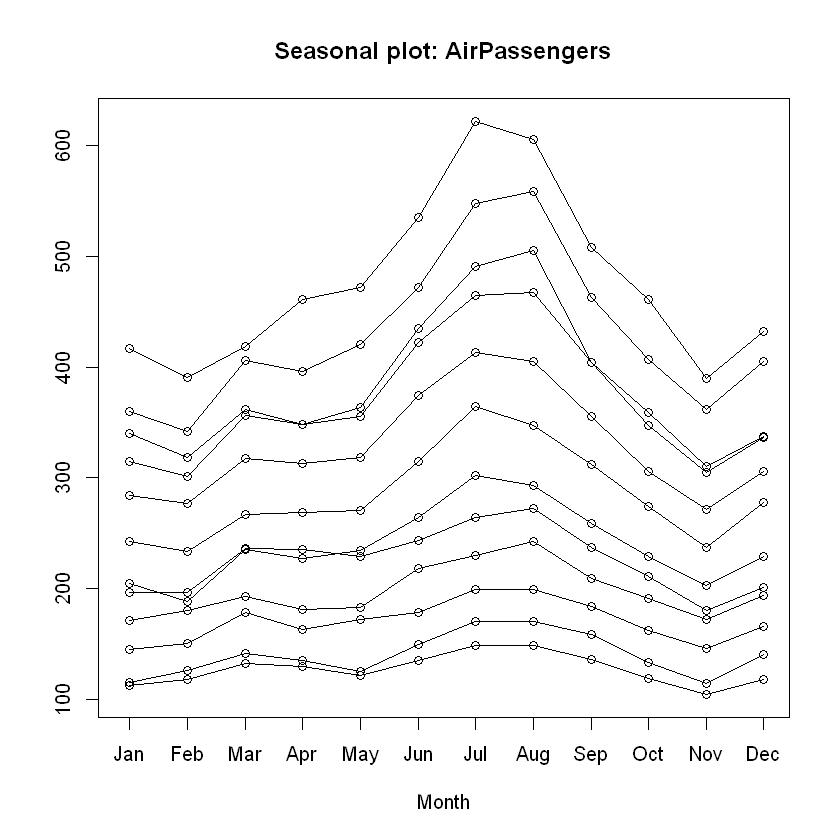

In [8]:
require(forecast)
seasonplot(AirPassengers)

С увеличением значения года наблюдается тенденция к росту объемов пассажирских перевозок; иначе говоря, увеличивается скорость роста. Наибольший рост наблюдается в течение двух месяцев — июля и августа.

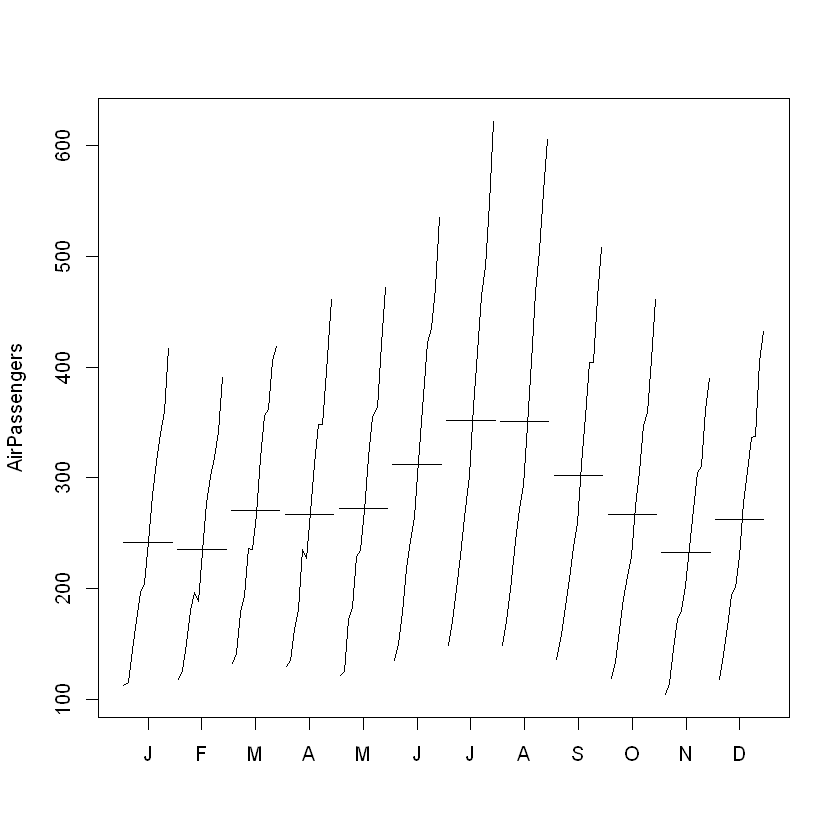

In [9]:
monthplot(AirPassengers)

При построении графиков данных временных рядов можно использовать сразу несколько временных осей. В одном из случаев отдельные временные оси представляют помесячную разбивку для каждого года (с января по декабрь), а в другом наборы данных для каждого года отображаются на единой временной оси (с первого по последний/двенадцатый год);
• Изучая результаты визуализации данных временных рядов, можно получить намного больше полезных сведений и составить более точные прогнозы, чем в ходе анализа линейных графиков.


Проиллюстрируем возможности двумерных гистограмм на небольшом наборе данных, а затем перейдем к анализу более содержательного примера. Напишем пользовательскую функцию построения двумерной гистограммы «с нуля».

А затем построим гистограмму в формате тепловой карты.

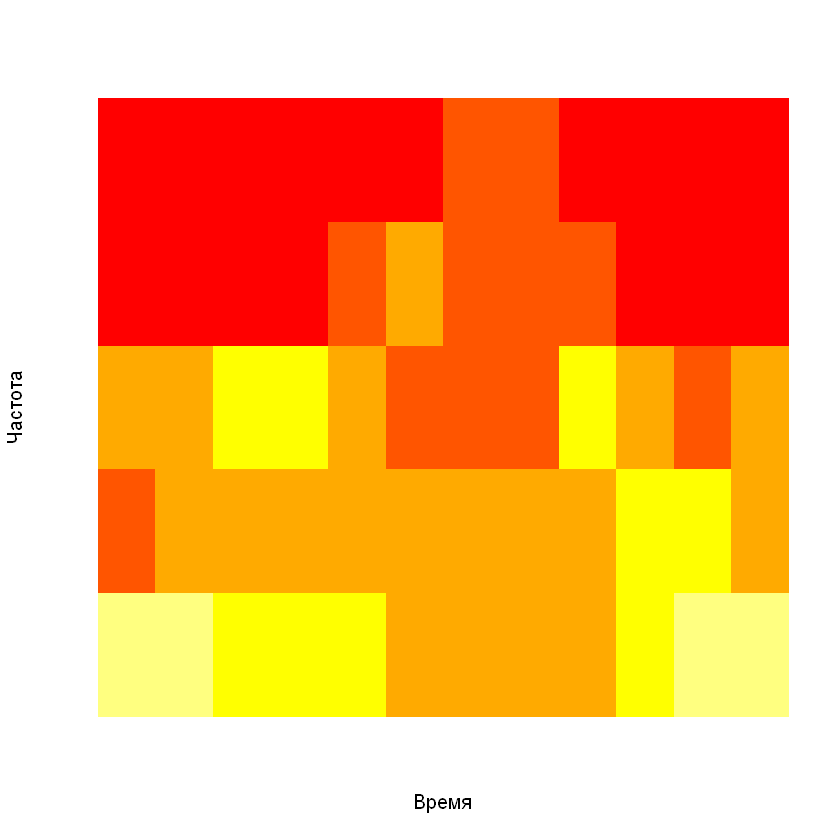

In [19]:
hist2d <- function(data, nbins.y, xlabels) {
  ## Создание равномерных интервалов на оси y, включающих
  ## минимальные и максимальные значения
  ymin <- min(data)
  ymax <- max(data) * 1.0001
  ## Ленивый способ вычислений, не требующий учета
  ## включаемых/исключаемых точек
  ybins <- seq(from = ymin, to = ymax, length.out = nbins.y + 1)
  ## Создание нулевой матрицы подходящего размера
  hist.matrix <- matrix(0, nrow = nbins.y, ncol = ncol(data))
  ## Данные представляются в виде матрицы, в которой каждая строка
  ## соответствует отдельной точке данных
  for (i in 1:nrow(data)) {
    ts <- findInterval(data[i, ], ybins)
    for (j in 1:ncol(data)) {
      hist.matrix[ts[j], j] <- hist.matrix[ts[j], j] + 1
    }
  }
  hist.matrix
}
h <- hist2d(t(matrix(AirPassengers, nrow = 12, ncol = 12)), 5, months)
image(1:ncol(h), 1:nrow(h), t(h), col = heat.colors(5),
      axes = FALSE, xlab = "Время", ylab = "Частота")

In [29]:
require (plotly)
require (data, table)
months = 1:12
ap = data.table(matrix (AirPassengers, nrow = 12, ncol = 12))
names(ap) = as.character(1949:1960)
ap[, month := months]
ap = melt(ap, id.vars = 'month')
names (ap) = c( "month", "year", "count")
p = plot_ly(ap, x = ~month, у = ~year, z = ~count,
color = ~as.factor (month)) %>%
add_markers() %>%
layout (scene = list(xaxis = list (title = 'Месяц'),
yaxis = list(title = 'Год'),
zaxis = list (title = 'AirPassenger')))

Загрузка требуемого пакета: plotly

Загрузка требуемого пакета: ggplot2


Присоединяю пакет: 'plotly'


Следующий объект скрыт от 'package:ggplot2':

    last_plot


Следующий объект скрыт от 'package:stats':

    filter


Следующий объект скрыт от 'package:graphics':

    layout


Загрузка требуемого пакета: data



ERROR: Error: Must supply `x` and `y` attributes


In [33]:
file.location = 'https: //raw.githubusercontent.com/plotly/datasets/master/"\"_3d-line-plot.csv'
data = read.csv (file.location)
p = plot_ly (data, x = ~x1, у = ~y1, z = ~z1, type = 'scatter3d', mode = 'lines1', line = list (color = '#1f77b4', width = 1))


Warning message in file(file, "rt"):
"не могу открыть файл 'https: //raw.githubusercontent.com/plotly/datasets/master/""_3d-line-plot.csv': Invalid argument"


ERROR: Error in file(file, "rt"): не могу открыть соединение


In [34]:
## R uses radians so to set frequency we'll do radians

In [35]:
x = 1:100

In [36]:
## Noiseless series

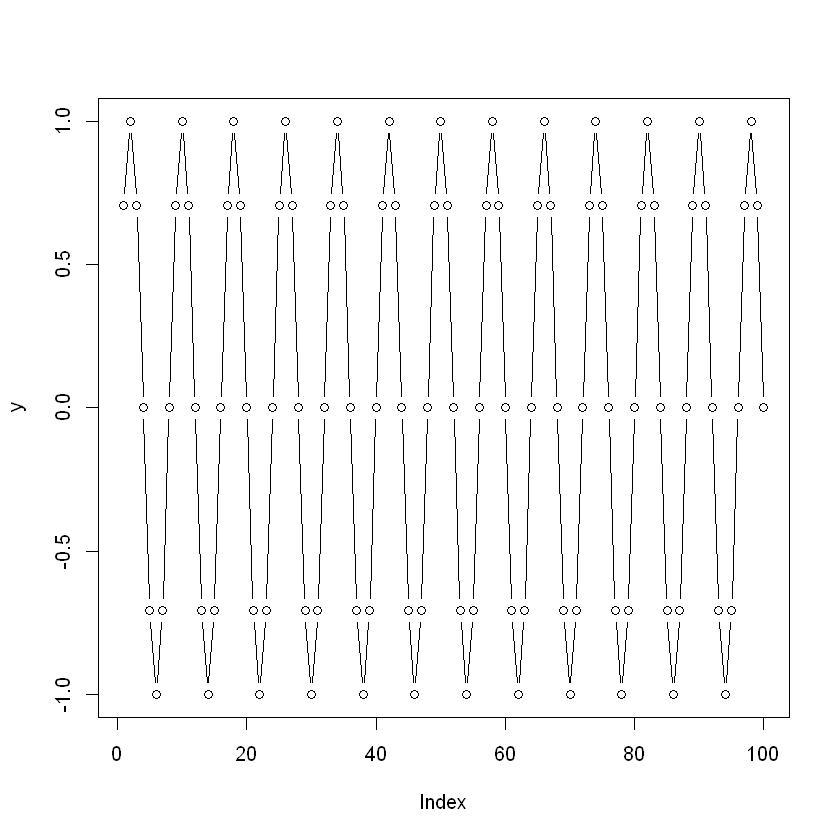

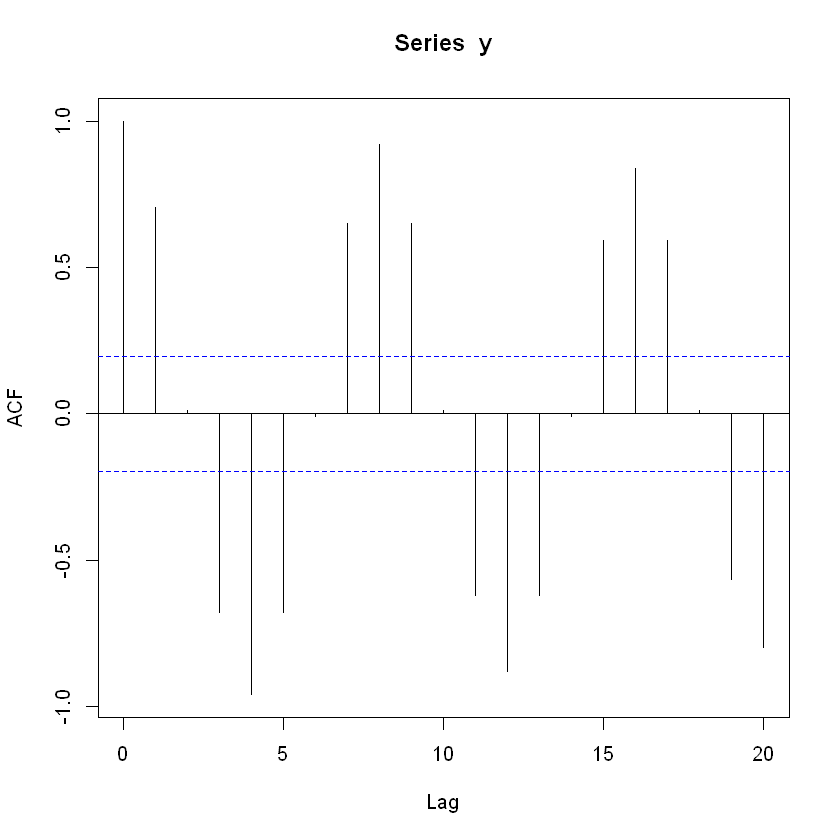

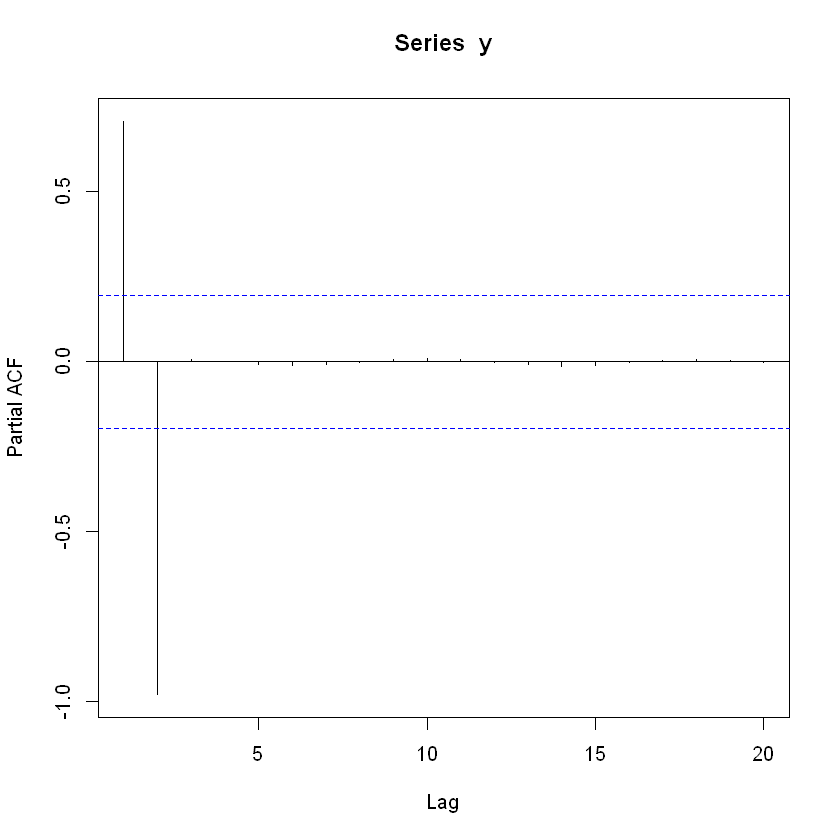

In [37]:
y = sin(x * pi / 4) 
plot(y, type = 'b')
acf(y)
pacf(y)

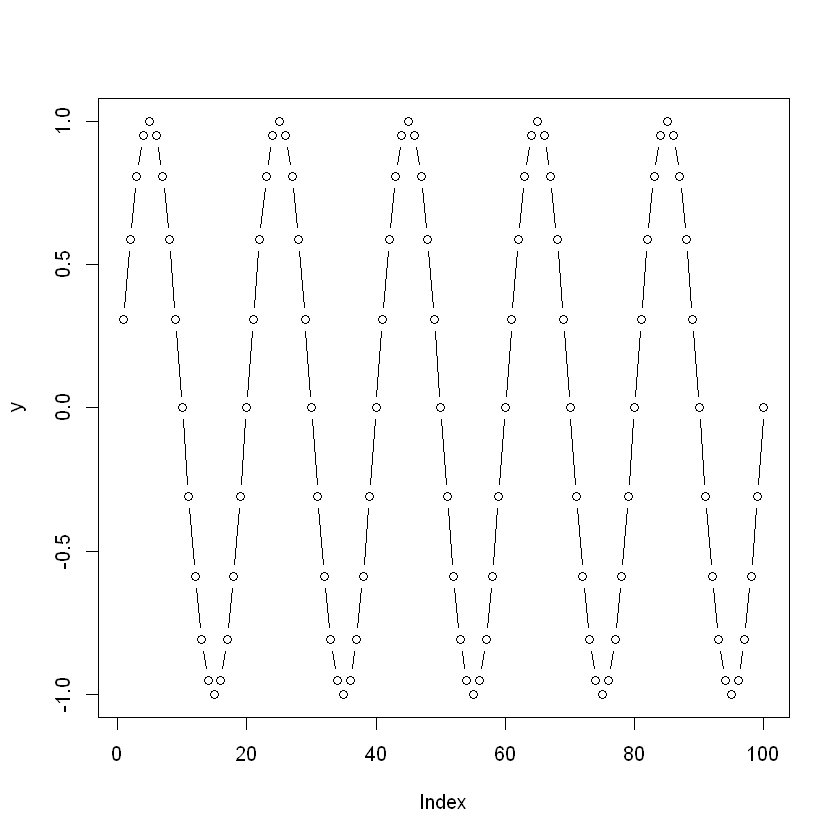

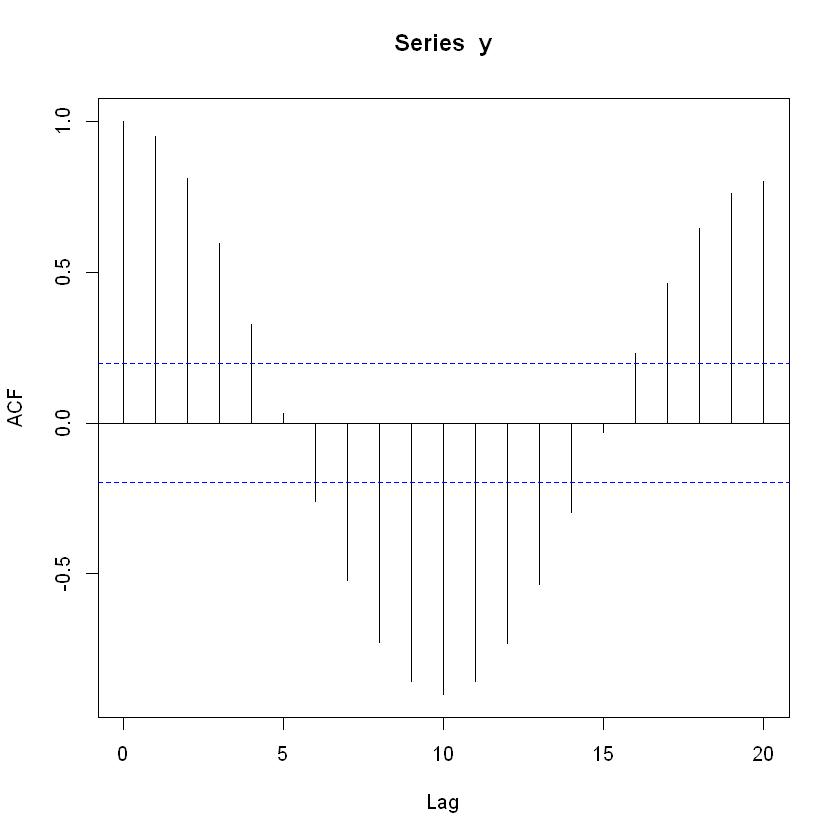

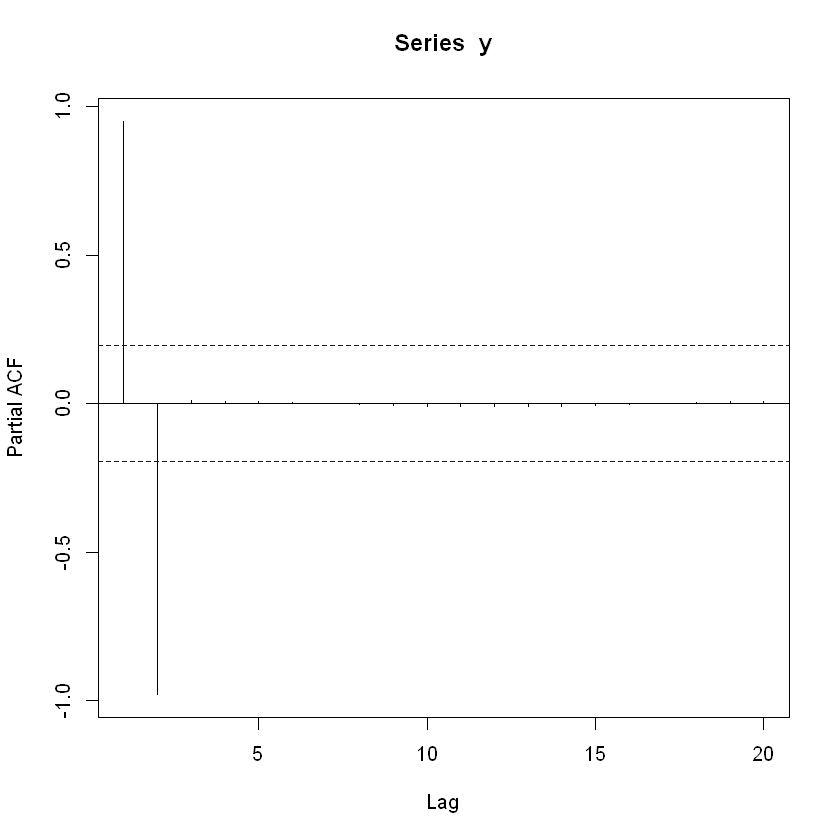

In [38]:
y = sin(x * pi / 10)
plot(y, type = 'b')
acf(y)
pacf(y)

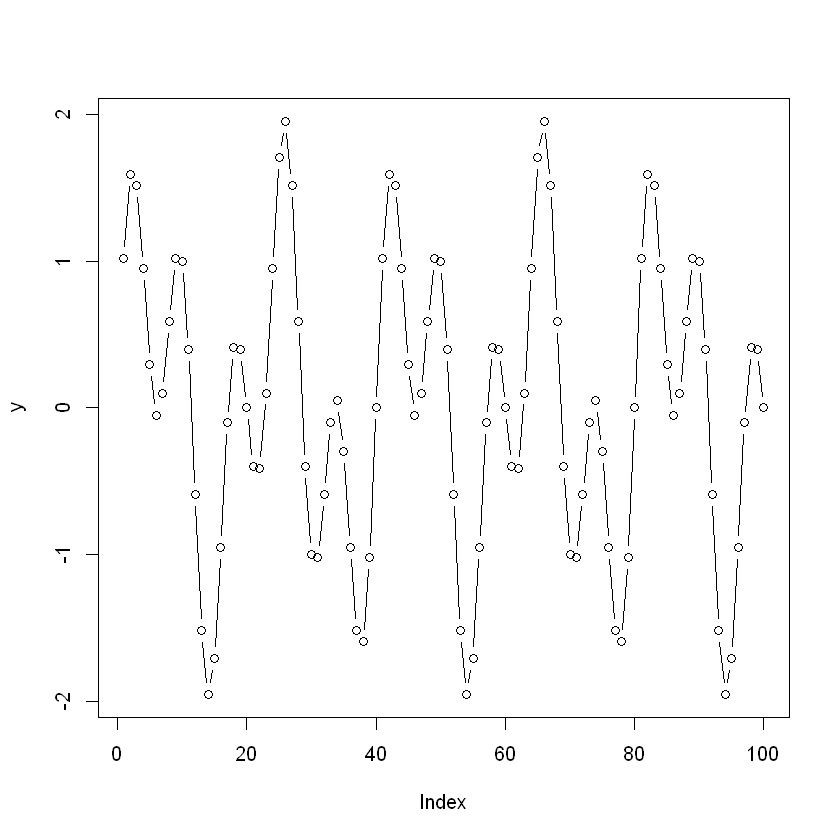

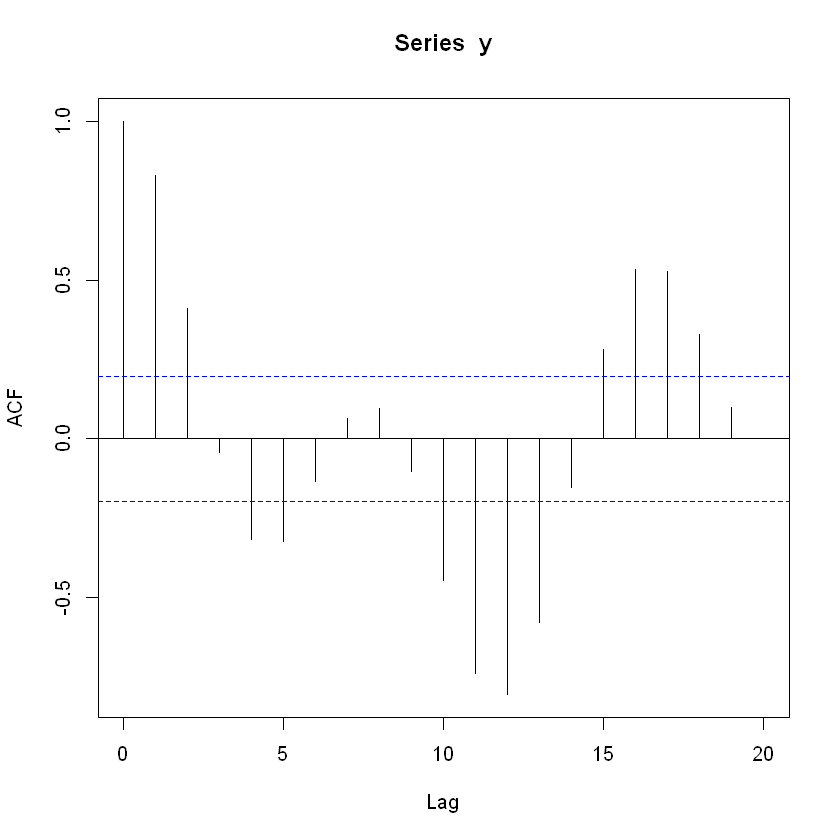

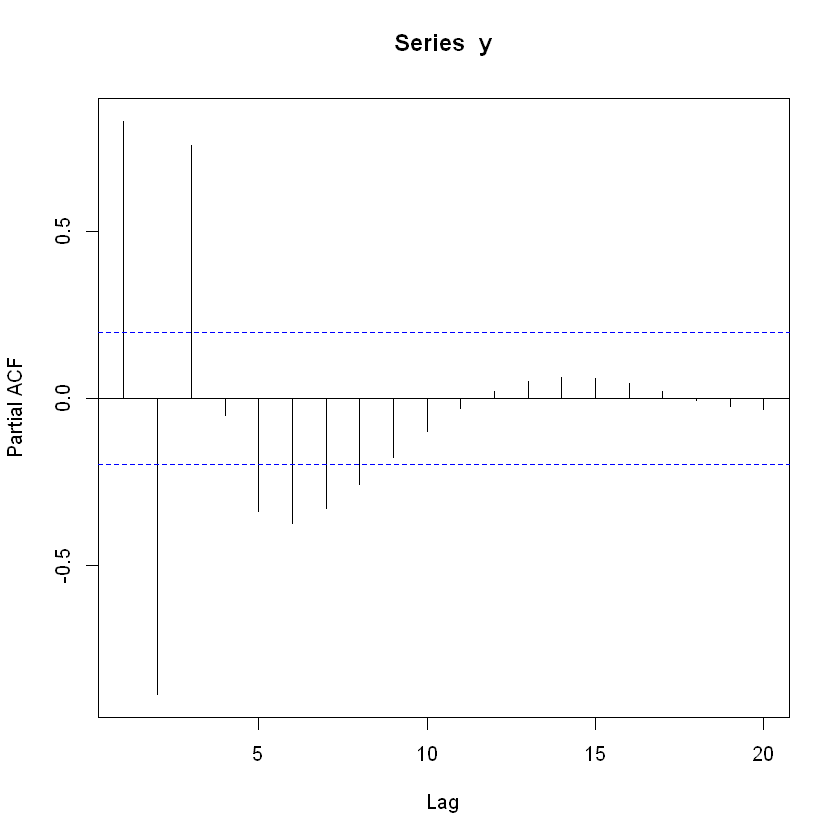

In [39]:
y = sin(x * pi / 4) + sin(x * pi / 10)
plot(y, type = 'b')
acf(y)
pacf(y)

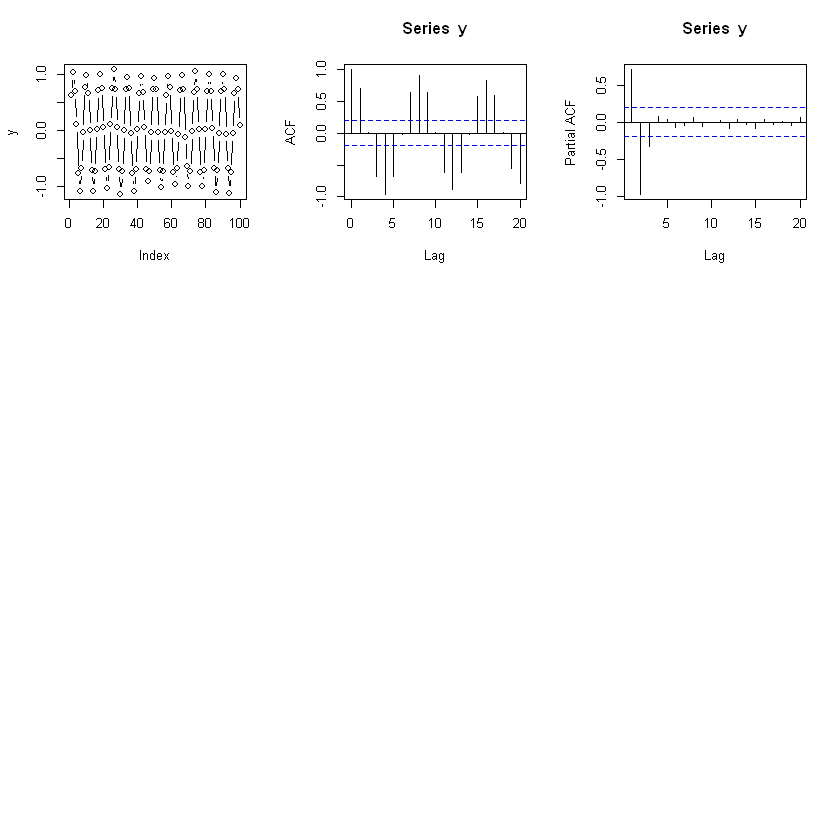

In [40]:
par(mfrow = c(3, 3))
## Somewhat noisy series
noise1 = rnorm(100, sd = 0.05)
noise2 = rnorm(100, sd = 0.05)
par(mfrow = c(3, 3))
y = sin(x * pi / 4) + noise1
plot(y, type = 'b')
acf(y)
pacf(y)

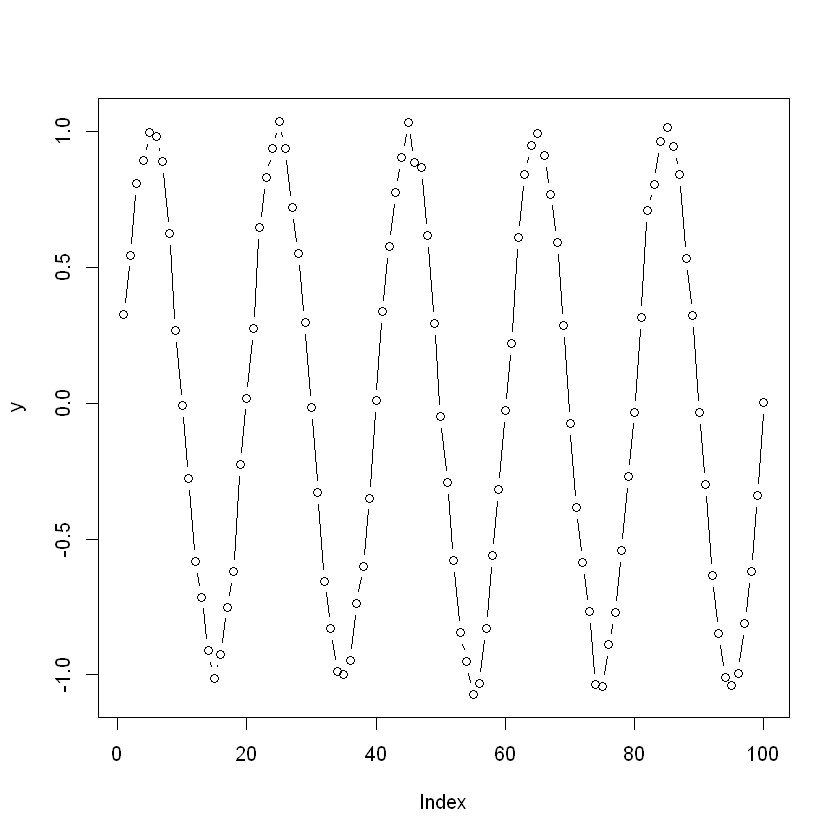

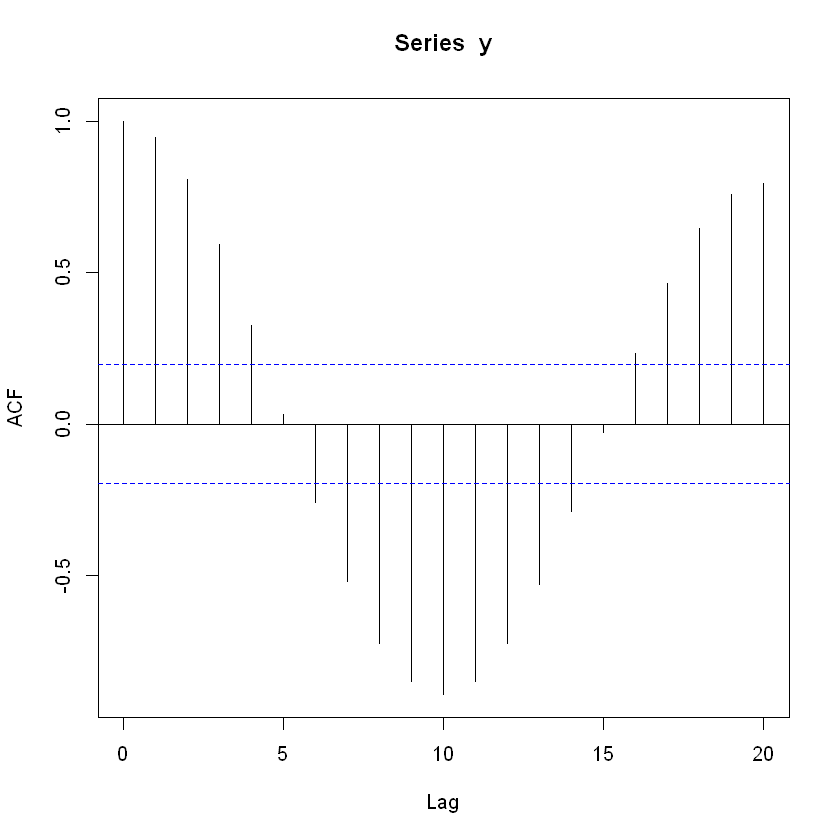

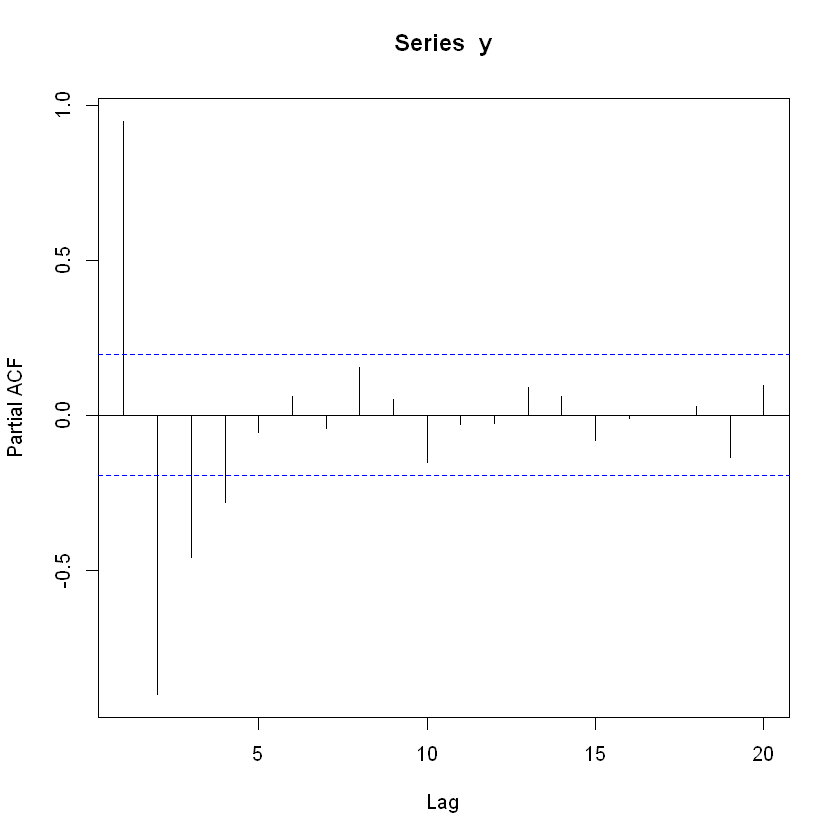

In [41]:
y = sin(x * pi / 10) + noise2
plot(y, type = 'b')
acf(y)
pacf(y)

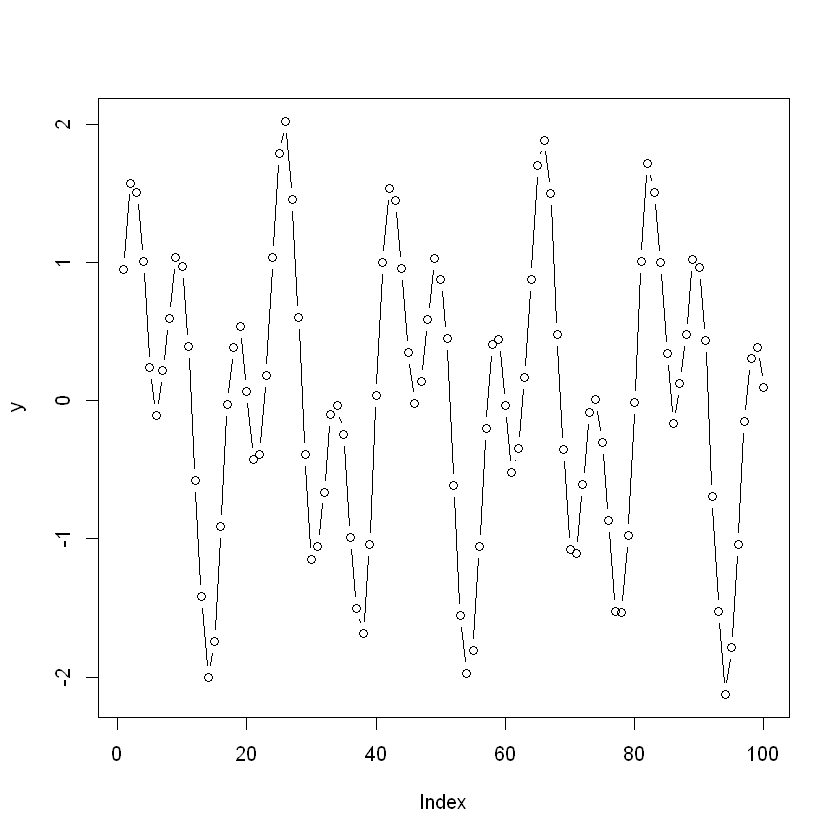

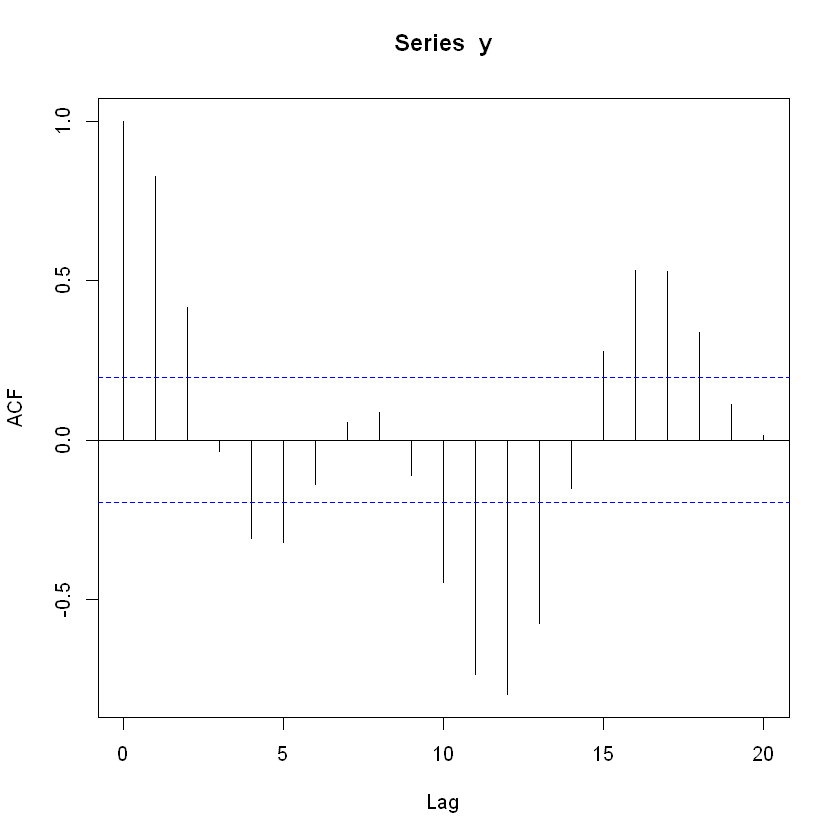

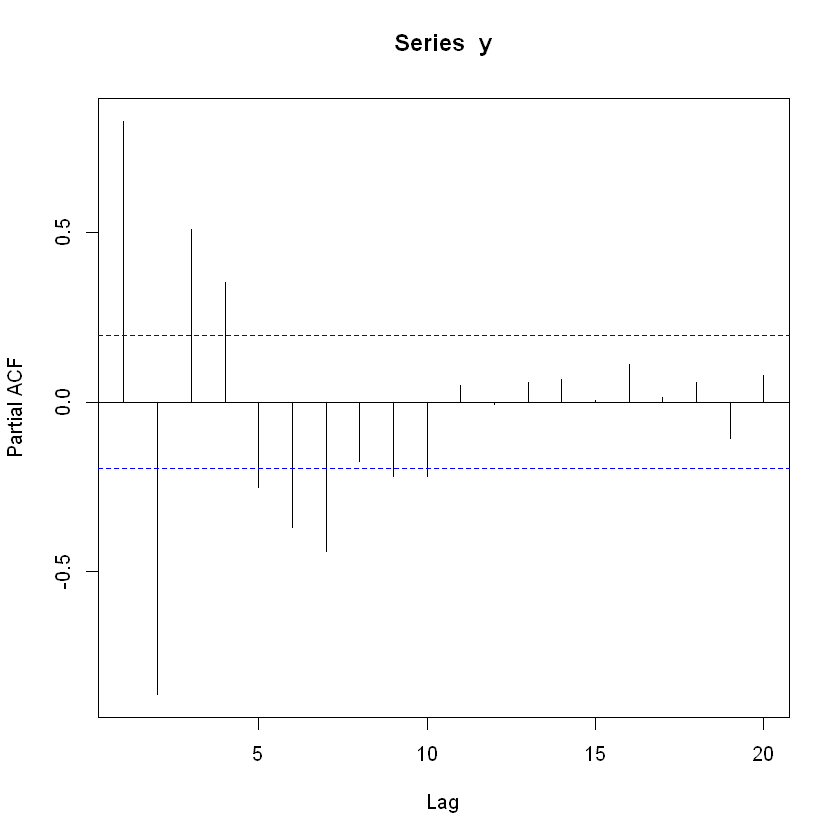

In [42]:
y = sin(x * pi / 4) + sin(x * pi / 10) + noise1 + noise2
plot(y, type = 'b')
acf(y)
pacf(y)

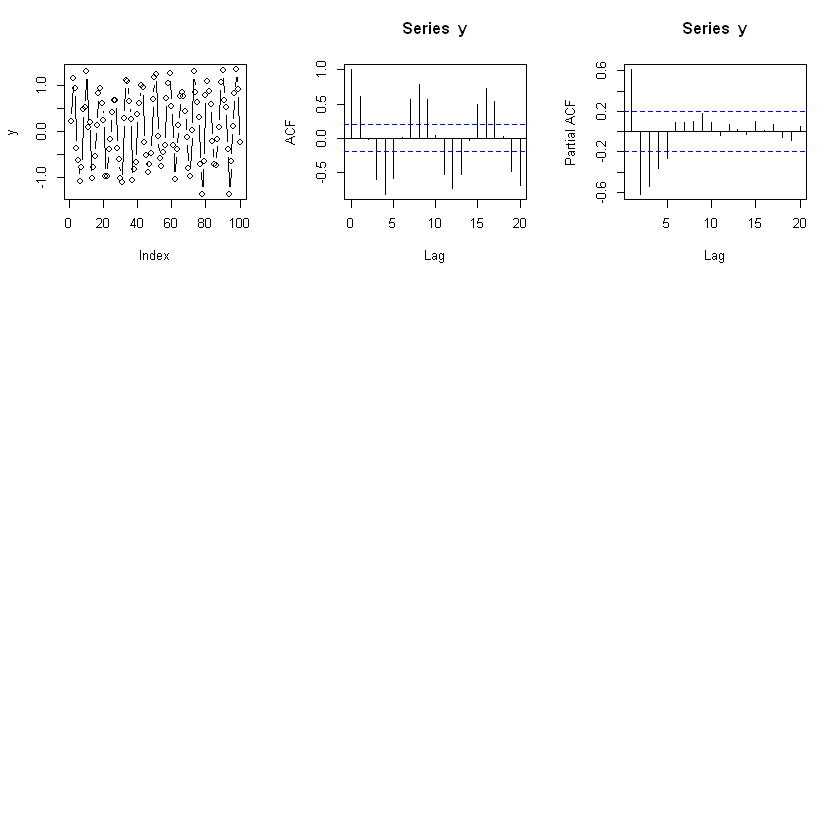

In [43]:
## Very noisy series
noise1 = rnorm(100, sd = 0.3)
noise2 = rnorm(100, sd = 0.3)
par(mfrow = c(3, 3))
y = sin(x * pi / 4) + noise1
plot(y, type = 'b')
acf(y)
pacf(y)

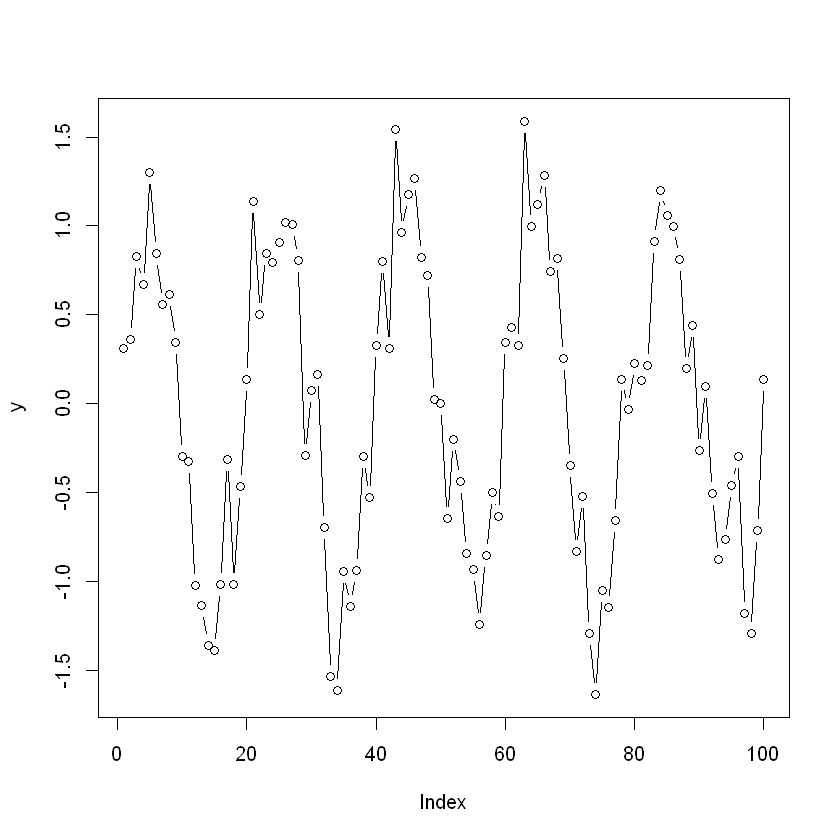

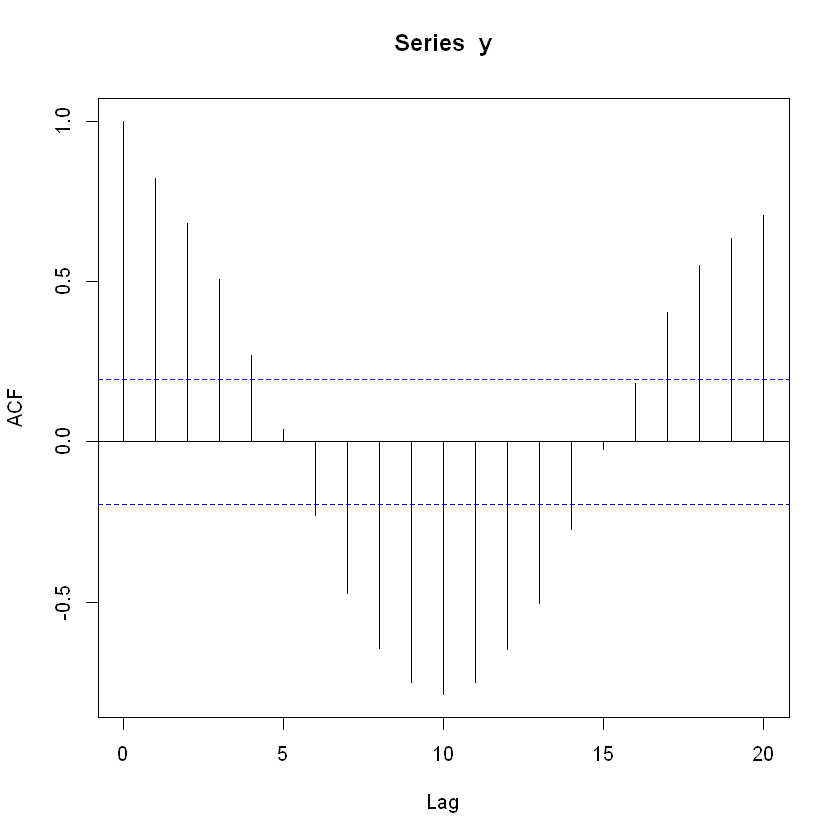

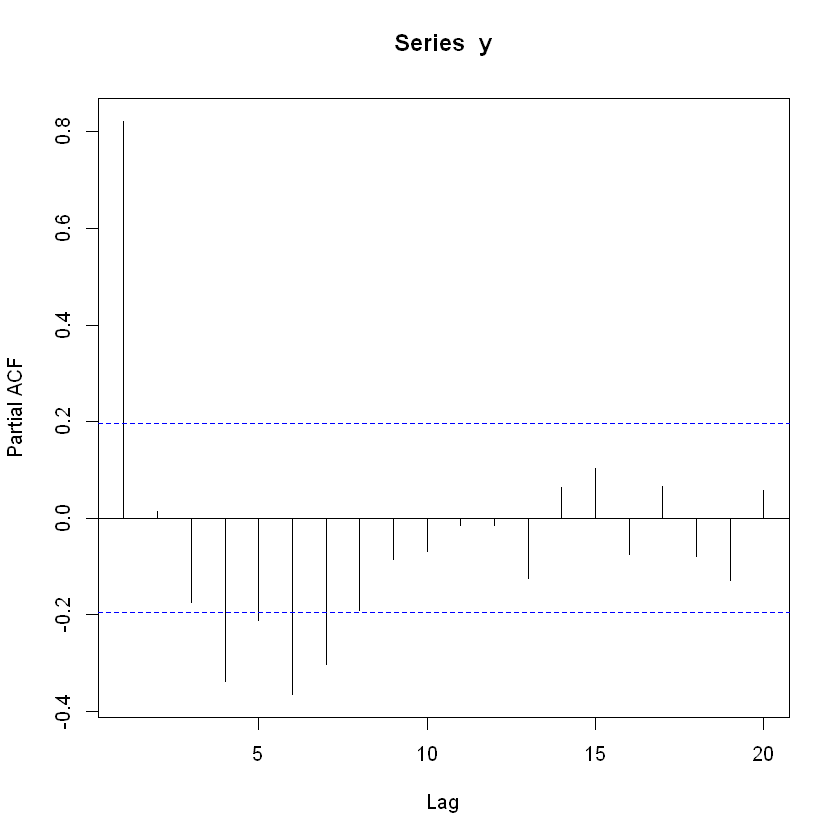

In [44]:
y = sin(x * pi / 10) + noise2
plot(y, type = 'b')
acf(y)
pacf(y)

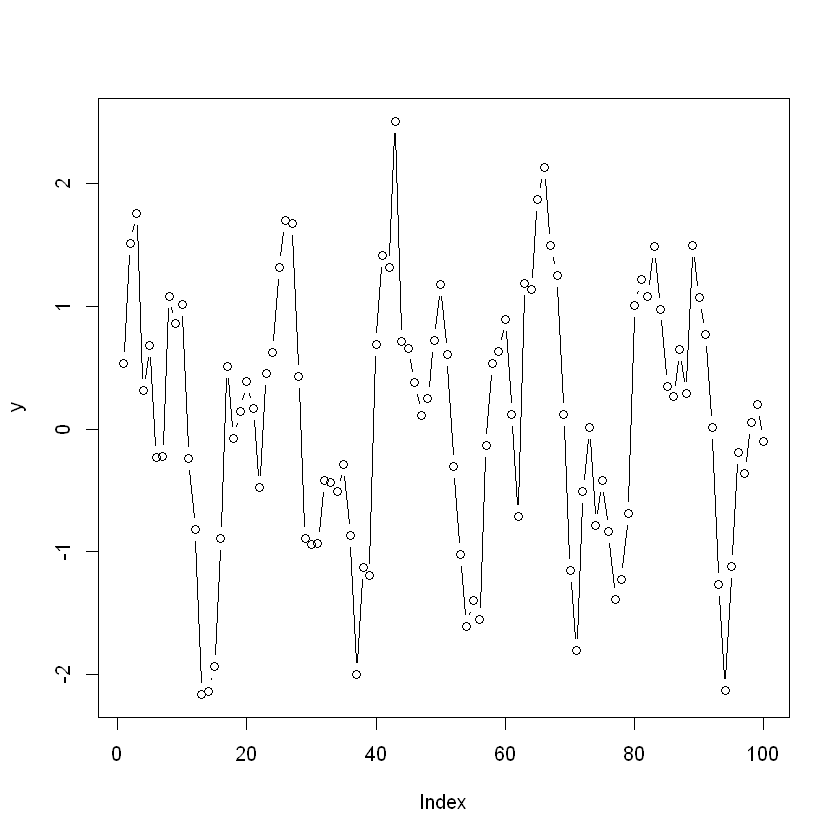

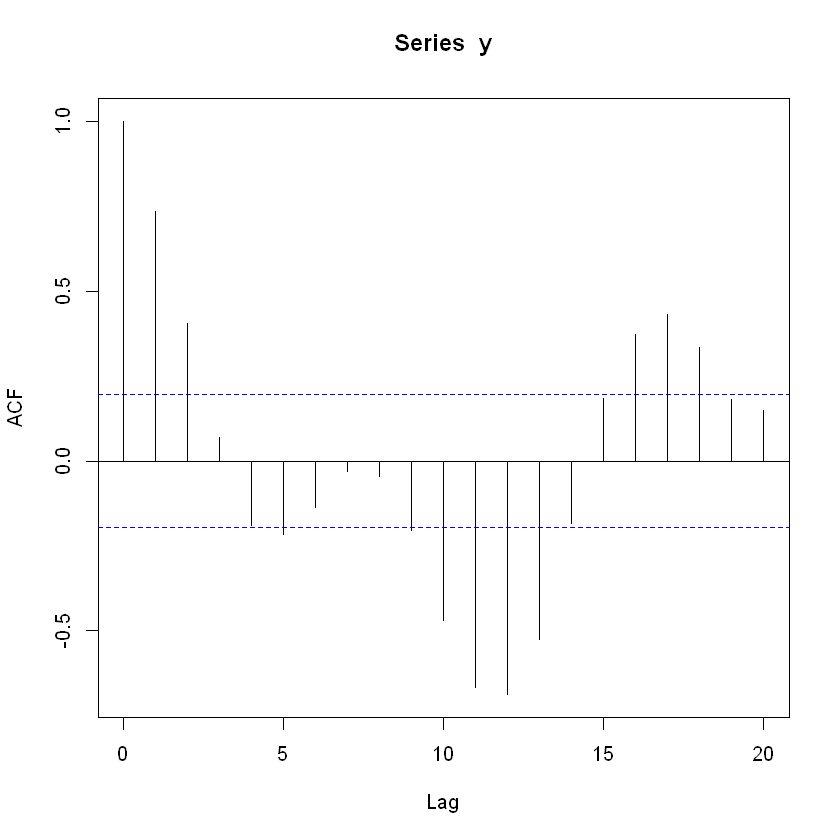

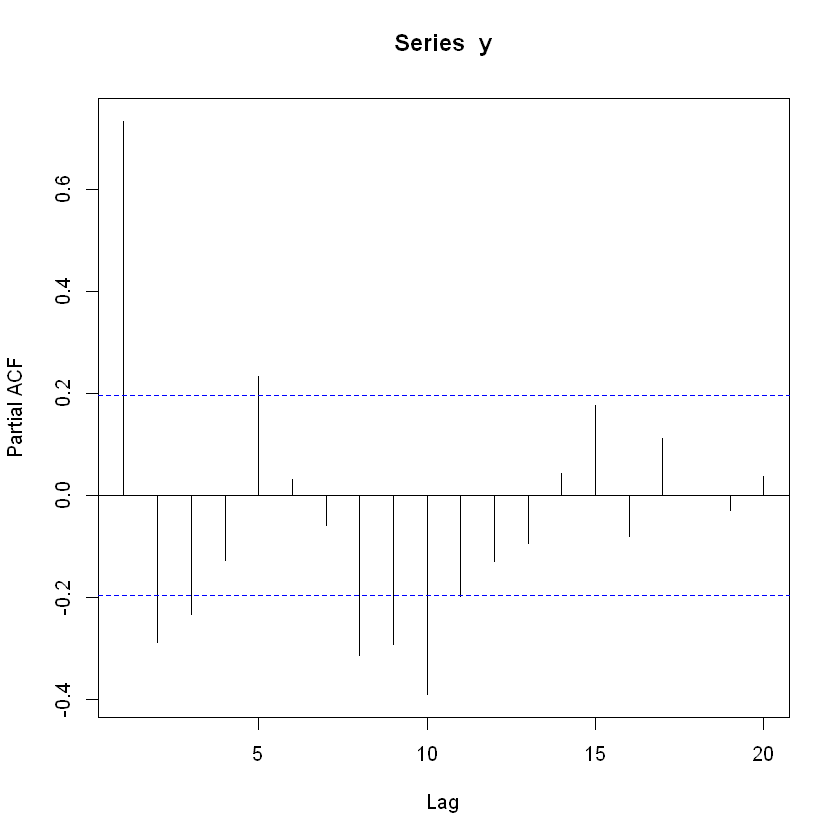

In [45]:
y = sin(x * pi / 4) + sin(x * pi / 10) + noise1 + noise2
plot(y, type = 'b')
acf(y)
pacf(y)

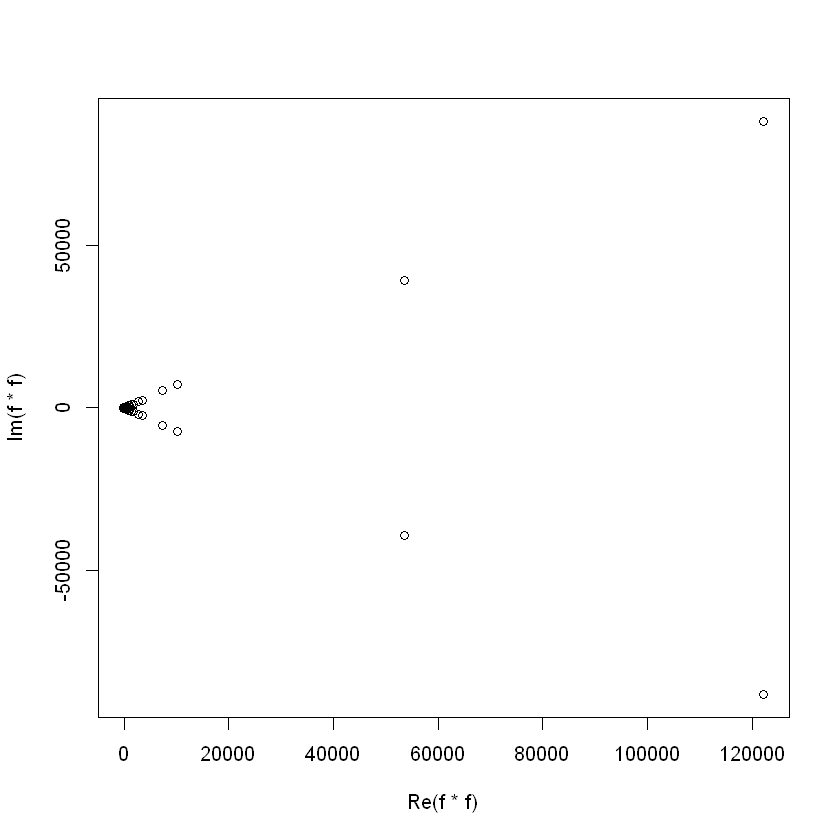

In [46]:
x <- 1:1024
y <- sin(x * pi / 5)
f <- fft(y)
plot(f * f)

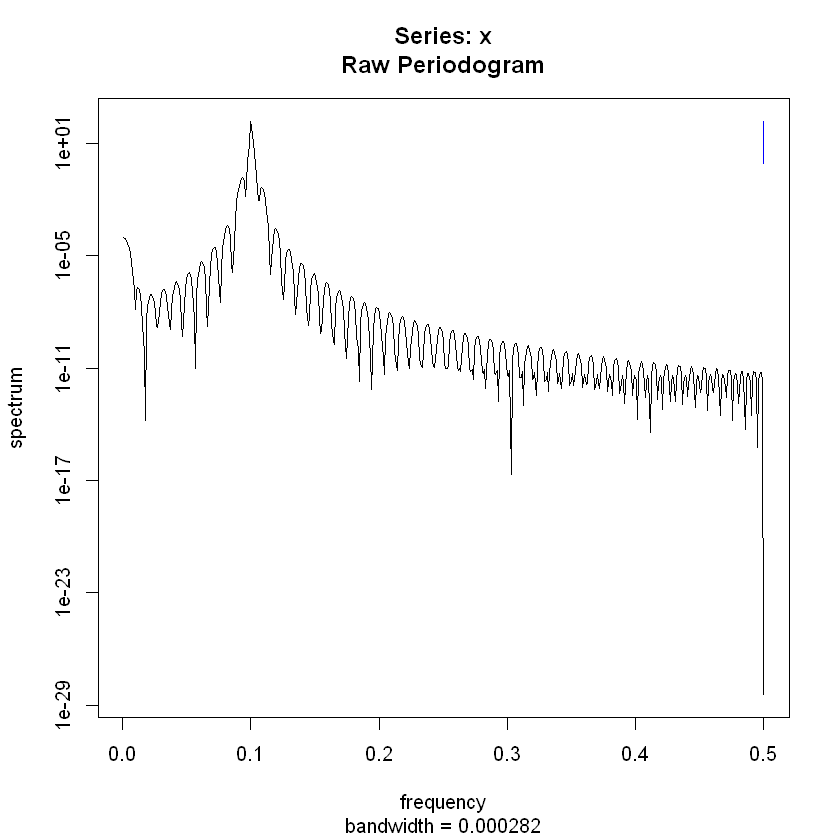

In [47]:
## stats package
require(stats)
spectrum(y)

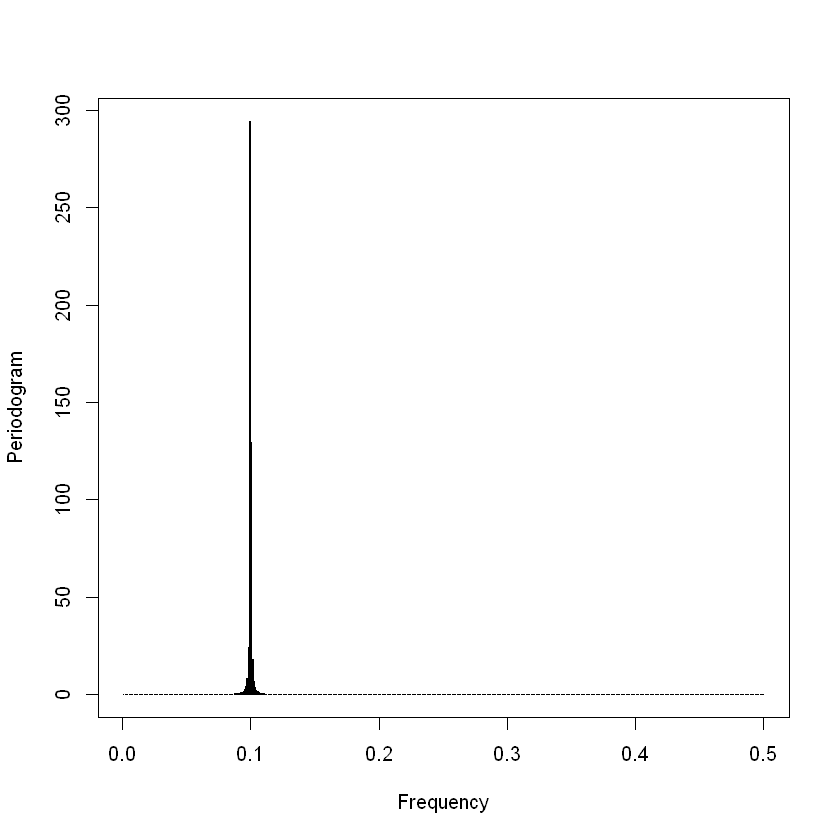

In [50]:
## TSA package
require(TSA)
periodogram(y)

In [51]:
## roll your own with stats fft package

In [52]:
## http://www.di.fc.ul.pt/~jpn/r/fourier/fourier.html

In [53]:
plot.frequency.spectrum <- function(X.k, xlimits=c(0,length(X.k))) {
  plot.data  <- cbind(0:(length(X.k)-1), Mod(X.k))

  plot.data[2:length(X.k),2] <- 2*plot.data[2:length(X.k),2] 
  
  plot(plot.data, t="h", lwd=2, main="", 
       xlab="Frequency (Hz)", ylab="Strength", 
       xlim=xlimits, ylim=c(0,max(Mod(plot.data[,2]))))
}

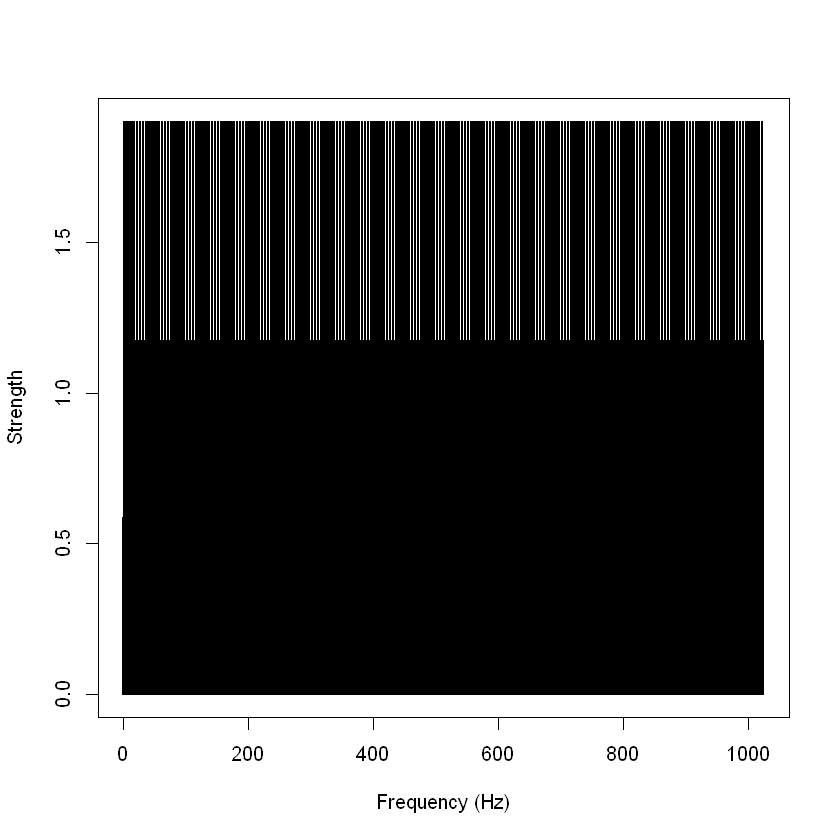

In [54]:
plot.frequency.spectrum(y)

In [55]:
acq.freq <- 100                    # data acquisition (sample) frequency (Hz)
time     <- 6                      # measuring time interval (seconds)
ts       <- seq(0,time-1/acq.freq,1/acq.freq) # vector of sampling time-points (s) 
f.0 <- 1/time

In [56]:
dc.component.   <- 1
component.freqs <- c(3,7,10)        # frequency of signal components (Hz)
component.delay <- c(0,0,0)         # delay of signal components (radians)
component.strength <- c(1.5,.5,.75) # strength of signal components

In [57]:
f   <- function(t,w) { 
  dc.component + 
  sum( component.strength * sin(component.freqs*w*t + component.delay)) 
}

In [65]:
require(ggplot2)
plot.fourier(f,f.0,ts=ts)

ERROR: Error in plot.fourier(f, f.0, ts = ts): не могу найти функцию "plot.fourier"


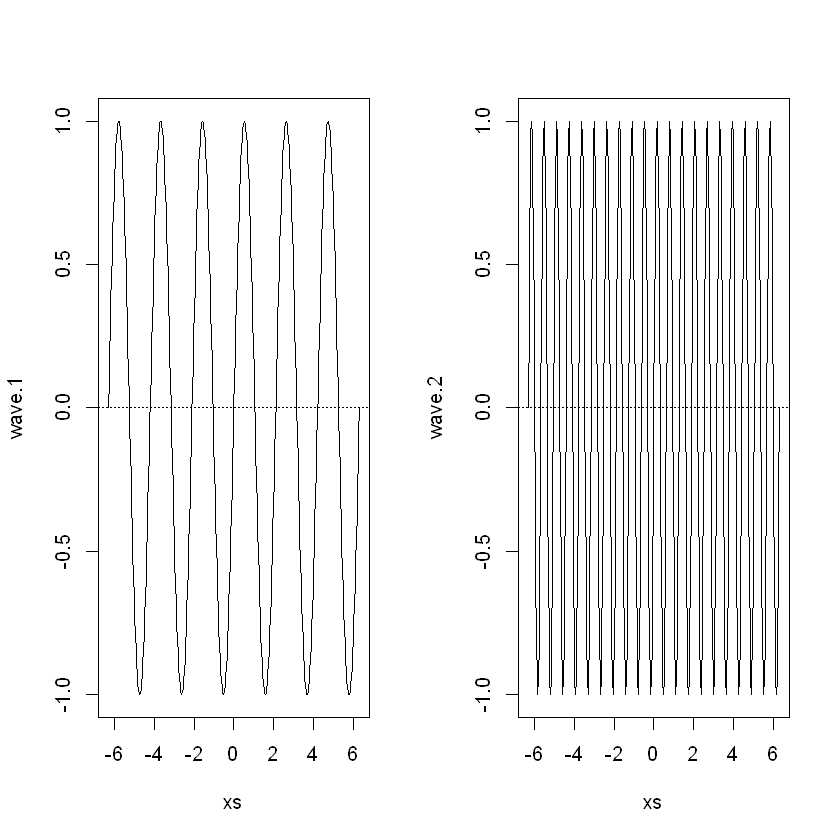

In [71]:
xs <- seq(-2*pi,2*pi,pi/100)
wave.1 <- sin(3*xs)
wave.2 <- sin(10*xs)
par(mfrow = c(1, 2))
plot(xs,wave.1,type="l",ylim=c(-1,1)); abline(h=0,lty=3)
plot(xs,wave.2,type="l",ylim=c(-1,1)); abline(h=0,lty=3)

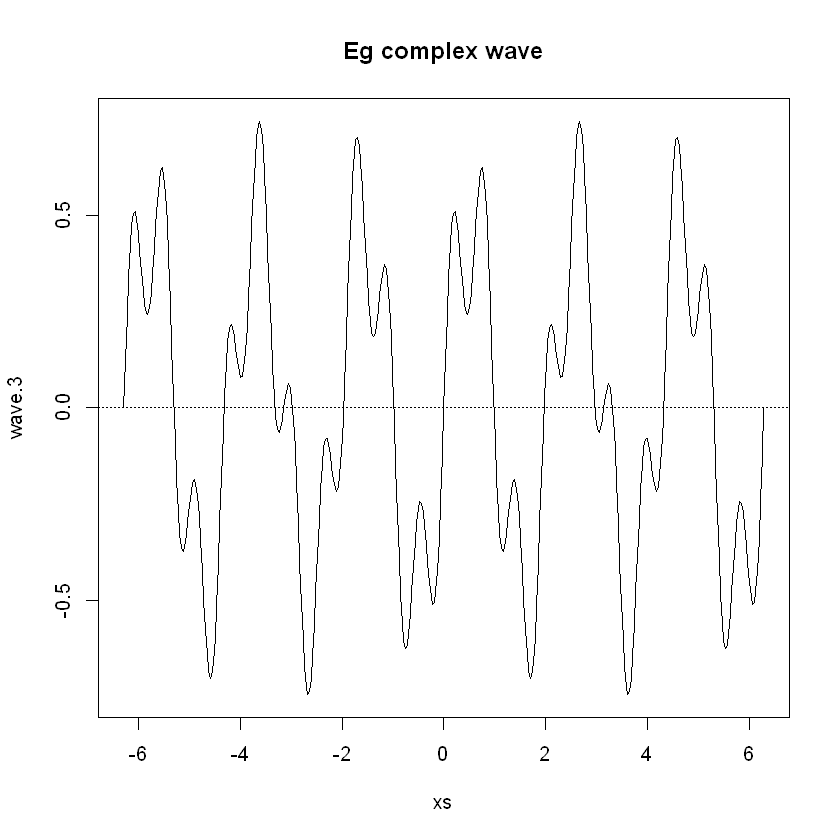

In [72]:
wave.3 <- 0.5 * wave.1 + 0.25 * wave.2
plot(xs,wave.3,type="l"); title("Eg complex wave"); abline(h=0,lty=3)

Fourier Series

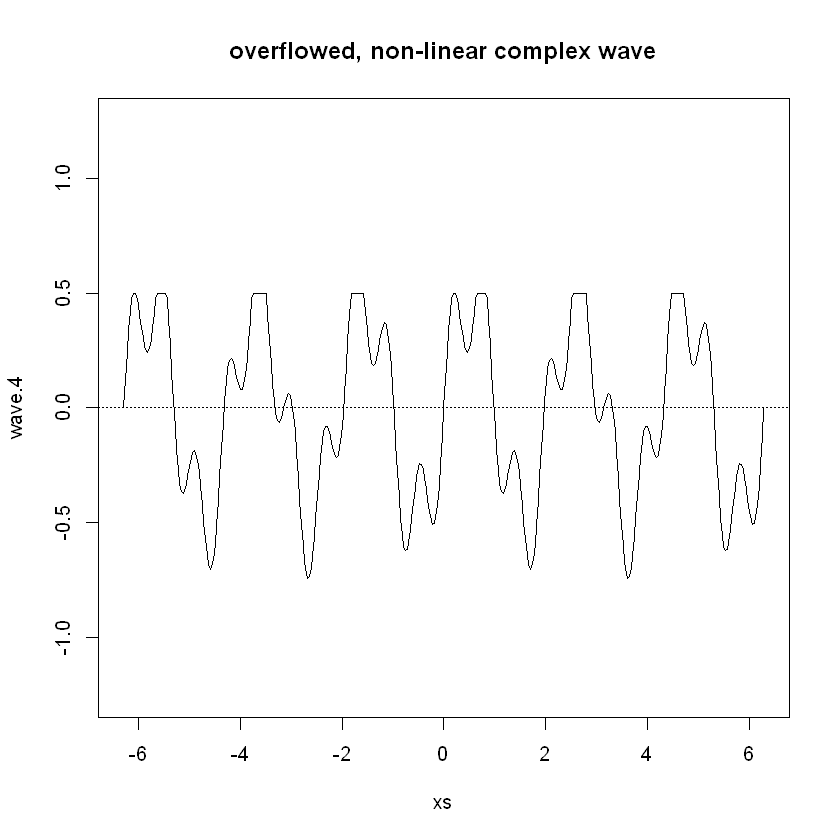

In [73]:
wave.4 <- wave.3
wave.4[wave.3>0.5] <- 0.5
plot(xs,wave.4,type="l",ylim=c(-1.25,1.25)); title("overflowed, non-linear complex wave"); abline(h=0,lty=3)

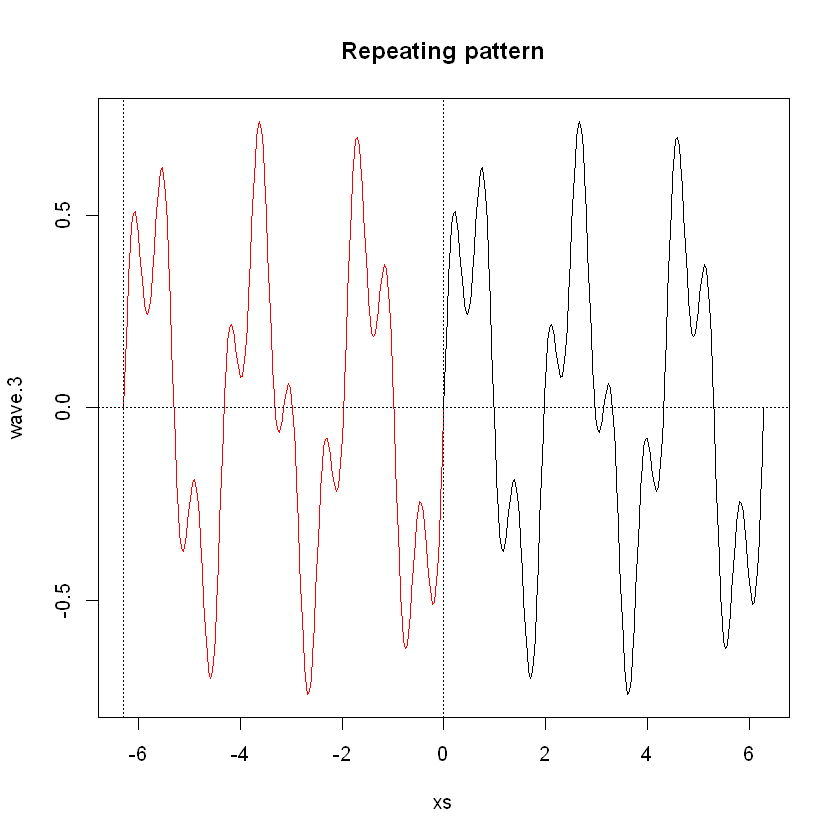

In [74]:
repeat.xs     <- seq(-2*pi,0,pi/100)
wave.3.repeat <- 0.5*sin(3*repeat.xs) + 0.25*sin(10*repeat.xs)
plot(xs,wave.3,type="l"); title("Repeating pattern")
points(repeat.xs,wave.3.repeat,type="l",col="red"); abline(h=0,v=c(-2*pi,0),lty=3)

f(t)=0.5×sin(3wt)+0.25×sin(10wt)

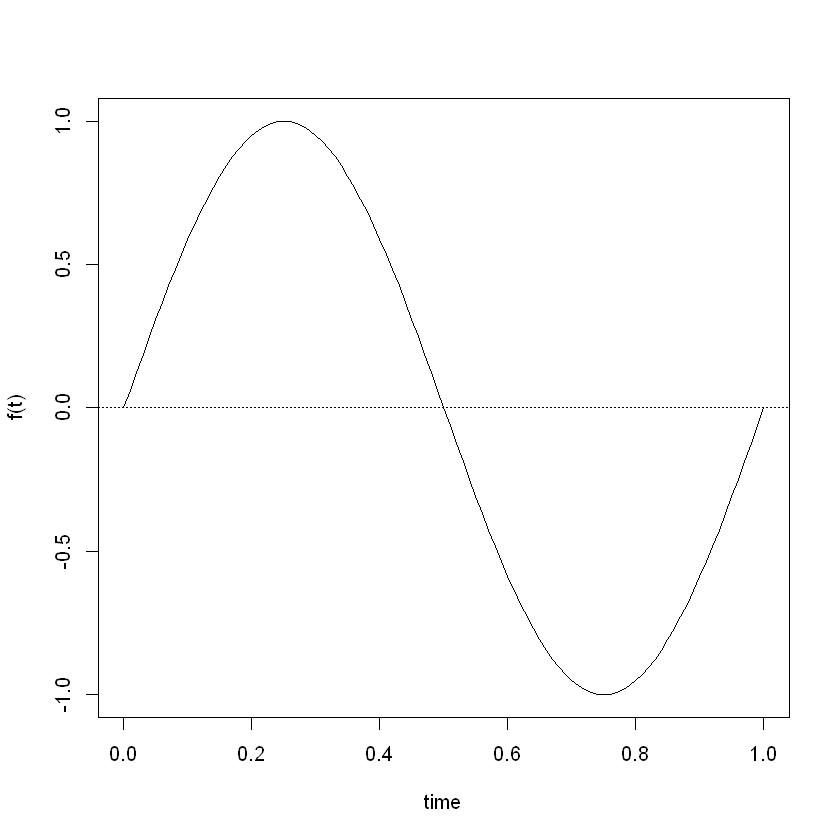

In [75]:
plot.fourier <- function(fourier.series, f.0, ts) {
  w <- 2*pi*f.0
  trajectory <- sapply(ts, function(t) fourier.series(t,w))
  plot(ts, trajectory, type="l", xlab="time", ylab="f(t)"); abline(h=0,lty=3)
}

# An eg
plot.fourier(function(t,w) {sin(w*t)}, 1, ts=seq(0,1,1/100)) 